# 1. Importation de librairie 

In [85]:
# 1. importation des librairies 
import numpy as np
import pandas as pd

# 2. Chargement des données 

In [86]:
# 2. Chargement des données 
data = pd.read_csv('Data/studentscores.csv')

In [87]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3. Analyse des données 

In [88]:
# 3. Analyse des données 
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [90]:
data['Hours'].max()

np.float64(9.2)

In [91]:
data['Hours'].min()

np.float64(1.1)

In [92]:
print(data['Hours'].max())

9.2


In [93]:
print("Max Score: ",data['Scores'].max())

Max Score:  95


In [94]:
print("Max Score: ",data['Scores'].min())

Max Score:  17


# 4. Division des données 

In [95]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


## Variable Indep et Variable Dep

In [96]:
X = data.iloc[ :, :-1].values
Y = data.iloc[ :, -1].values

In [97]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [98]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

## 4.1 Separation de données : Train et Test

In [99]:
#X_train, X_test, Y_train, Y_test
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=40)

In [101]:
print("X_Train Shape: ", X_train.shape)
print("X_Test Shape: ", X_test.shape)
print("Y_Train Shape: ", Y_train.shape)
print("Y_Test Shape: ", Y_test.shape)

X_Train Shape:  (18, 1)
X_Test Shape:  (7, 1)
Y_Train Shape:  (18,)
Y_Test Shape:  (7,)


# 5. Construire le modèle 

In [102]:
# Importer l'algorithme de la Régression lineair
from sklearn.linear_model import LinearRegression

In [103]:
modele_lineaire = LinearRegression()

In [104]:
# Entraînement du modèle 
modele_lineaire.fit(X_train, Y_train)

LinearRegression()

In [105]:
# Faire de prédiction 
Y_scores_predits = modele_lineaire.predict(X_test)

In [106]:
Y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [107]:
Y_test

array([95, 86, 17, 69, 42, 75, 54])

In [108]:
resultats = pd.DataFrame(Y_test, Y_scores_predits)

In [109]:
resultats

,0
90.348621,95
79.201258,86
11.303688,17
75.147672,69
33.598413,42
86.295034,75
48.799361,54


In [110]:
# Évaluation du modèle 
from sklearn.metrics import mean_squared_error, r2_score

In [111]:
print("MSE de la Régression lineaire :", mean_squared_error(Y_test, Y_scores_predits))

MSE de la Régression lineaire : 51.90159659147337


In [112]:
print("R2 Score de la régression", r2_score(Y_test, Y_scores_predits))

R2 Score de la régression 0.9168569951293908


# 6. Visualisation de résultats 

In [113]:
# Importer MATPLOTLIB
import matplotlib.pyplot as plt 

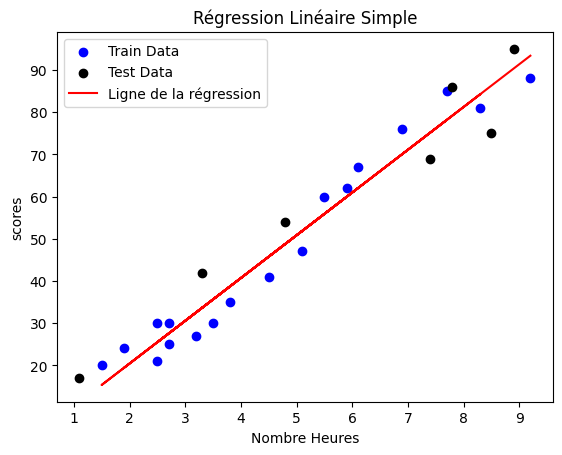

In [114]:
plt.scatter(X_train, Y_train, color='blue', label='Train Data')
plt.scatter(X_test, Y_test, color='black', label='Test Data')
plt.plot(X_train, modele_lineaire.predict(X_train), color='red', label='Ligne de la régression')
plt.xlabel('Nombre Heures')
plt.ylabel('scores')
plt.title('Régression Linéaire Simple')
plt.legend()
plt.show()

# 7. Prédiction Simple 

In [115]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [140]:
resulats = pd.DataFrame({'y-score-reel': Y_test, 'y-scores-predits': Y_scores_predits })
resulats

,y-score-reel,y-scores-predits
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [141]:
Y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [142]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [143]:
print(modele_lineaire.predict([[10]]))

[101.49598285]


In [144]:
difference = resulats['y-score-reel'].values - resulats['y-scores-predits'].values

In [145]:
difference

array([  4.65137943,   6.79874172,   5.696312  ,  -6.147672  ,
         8.40158743, -11.29503428,   5.20063886])

In [149]:
resulats['difference'] = difference

In [150]:
resulats

,y-score-reel,y-scores-predits,difference
0,95,90.348621,4.651379
1,86,79.201258,6.798742
2,17,11.303688,5.696312
3,69,75.147672,-6.147672
4,42,33.598413,8.401587
5,75,86.295034,-11.295034
6,54,48.799361,5.200639
